## Predicting Nigeria House Prices Using ML

Project Description: Exploring the Nigerian house dataset. In this project, we will be performing data cleaning,Exploratory Data Analysis,and finally, building a model to predict the price of a house based on the features in the dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Dataset


In [2]:
df = pd.read_csv('nigeria_houses_data.csv')
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


## Understanding the Data

In [3]:
# shape
df.shape

(24326, 8)

# * The dataset contains 24,326 records and 8 features

In [4]:
# descriptive stats
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


# **There is no missing values and all features are in the appropriate types

In [6]:
# correlation
df.corr()

,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.726557,0.610501,0.158528,0.025734
bathrooms,0.726557,1.000000,0.719102,0.174129,0.021965
toilets,0.610501,0.719102,1.000000,0.225345,0.015486
parking_space,0.158528,0.174129,0.225345,1.000000,0.018370
price,0.025734,0.021965,0.015486,0.018370,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

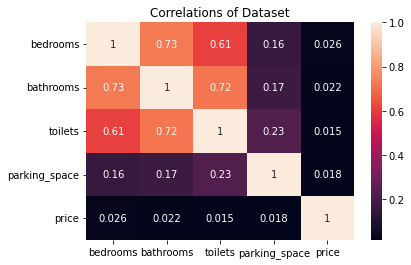

In [7]:
# visualize the correlation
sns.heatmap(df.corr(),annot=True)
plt.title("Correlations of Dataset")
plt.show

# Total numbers of Properties

In [8]:
len(df)

24326

## Unique Titles of Properties

In [9]:
for t in df['title'].unique():
    print(f"*{t}")
    
# print length
print(f"\nThere are {len(df['title'].unique())}unique titles.")

*Detached Duplex
*Terraced Duplexes
*Semi Detached Duplex
*Detached Bungalow
*Block of Flats
*Semi Detached Bungalow
*Terraced Bungalow

There are 7unique titles.


## Unique States of Properties

In [10]:
for t in df['state'].unique():
    print(f"*{t}")
    
# print length
print(f"\nThere are {len(df['state'].unique())}unique states.")

*Abuja
*Lagos
*Edo
*Ogun
*Oyo
*Imo
*Anambara
*Rivers
*Enugu
*Kaduna
*Kwara
*Nasarawa
*Abia
*Delta
*Akwa Ibom
*Osun
*Ekiti
*Cross River
*Kogi
*Plateau
*Kano
*Katsina
*Bayelsa
*Borno
*Niger

There are 25unique states.


## Unique Towns of Properties

In [11]:
for t in df['town'].unique():
    print(f"*{t}")
    
# print length
print(f"\nThere are {len(df['town'].unique())}unique towns.")

*Mabushi
*Katampe
*Lekki
*Ajah
*Epe
*Lokogoma District
*Oredo
*Victoria Island (VI)
*Mowe Ofada
*Ikeja
*Ikoyi
*Magodo
*Kaura
*Galadimawa
*Gwarinpa
*Abeokuta North
*Lugbe District
*Ibeju Lekki
*Yaba
*Sango Ota
*Ifako-Ijaiye
*Agege
*Ikorodu
*Jahi
*Ibadan
*Orozo
*Ifo
*Owerri North
*Guzape District
*Idu Industrial
*Owerri Municipal
*Isheri North
*Utako
*Port Harcourt
*Kuje
*Isheri
*Life Camp
*Ipaja
*Ado-Odo/Ota
*Dape
*Mushin
*Ejigbo
*Isolo
*Ojodu
*Gaduwa
*Enugu
*Dakwo
*Asokoro District
*Alimosho
*Sagamu
*Chikun
*Egbeda
*Wuye
*Kubwa
*Shomolu
*Ogudu
*Owerri West
*Ibafo
*Surulere
*Obio-Akpor
*Ayobo
*Apo
*Mowe Town
*Ibadan South-West
*Wuse 2
*Durumi
*Simawa
*Arepo
*Ikotun
*Oluyole
*Maitama District
*Maryland
*Ido
*Karsana
*Wuse
*Ilorin West
*Kurudu
*Karmo
*Abeokuta South
*KM 46
*Gbagada
*Idimu
*Kaduna South
*Magboro
*Gudu
*Kukwaba
*Mbora (Nbora)
*Obafemi Owode
*Jabi
*Karu
*Ojo
*Garki
*Aba
*Ogijo
*Asaba
*Uyo
*Kosofe
*Oyigbo
*Karshi
*Osogbo
*Kado
*Ilupeju
*Afijio
*Ketu
*Ado-Ekiti
*Ibadan North
*

## Univariant Analysis

Distribution of Prices

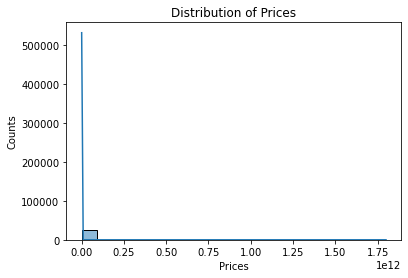

In [12]:
sns.histplot(df['price'],bins=20,kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Prices')
plt.ylabel('Counts')
plt.show()

## Bivariate Analysis
* Count of Houses by state

In [13]:
df['state'].value_counts()

Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Abia               9
Nasarawa           9
Kwara              9
Kogi               8
Cross River        2
Plateau            2
Kano               2
Katsina            2
Bayelsa            2
Borno              2
Niger              1
Name: state, dtype: int64

In [14]:
count_by_state = df['state'].value_counts()[0:10]

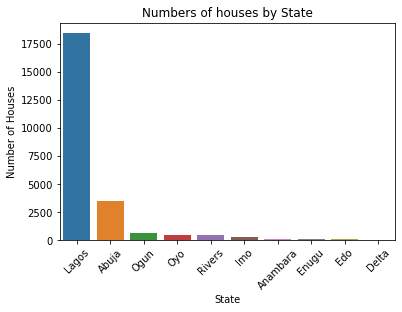

In [15]:
sns.barplot(x =count_by_state.index, y= count_by_state.values)
plt.title('Numbers of houses by State')
plt.xlabel('State')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()

**There are High numbers of housing in Lagos,followed by Abuja and Ogun

## * Count of houses by Title

In [16]:
df['title'].value_counts()

Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
Name: title, dtype: int64

In [17]:
count_by_title = df['title'].value_counts()[0:10]

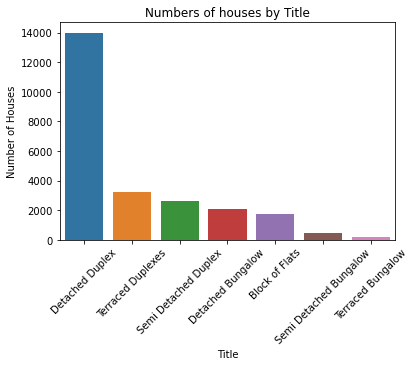

In [18]:
sns.barplot(x =count_by_title.index, y= count_by_title.values)
plt.title('Numbers of houses by Title')
plt.xlabel('Title')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()

## * Average price by State

In [19]:
df[['state','price']].groupby(by=df['state']).mean().sort_values('price',ascending=False).reset_index()[0:10]

,state,price
0,Lagos,3.457721e+08
1,Abuja,2.279246e+08
2,Rivers,1.303284e+08
3,Borno,1.050000e+08
4,Delta,1.030238e+08
5,Anambara,9.465267e+07
6,Abia,9.222222e+07
7,Bayelsa,9.000000e+07
8,Imo,7.472561e+07
9,Enugu,6.655977e+07


In [20]:
avg_price_by_state = df[['state','price']].groupby(by=df['state']).mean().sort_values('price',ascending=False).reset_index()[0:10]

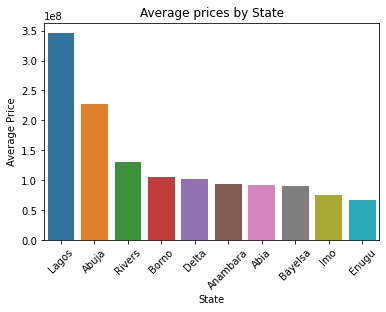

In [21]:
sns.barplot(x =avg_price_by_state['state'], y= avg_price_by_state['price'])
plt.title('Average prices by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


## * Average price by Town

In [22]:
avg_price_by_town = df[['town','price']].groupby(by=df['town']).mean().sort_values('price',ascending=False).reset_index()[0:10]
avg_price_by_town

,town,price
0,Ikoyi,2.262708e+09
1,Maitama District,7.137640e+08
2,Ifako-Ijaiye,6.683900e+08
3,Asokoro District,6.021501e+08
4,Guzape District,4.885660e+08
5,Katampe,3.982134e+08
6,Dakibiyu,3.872143e+08
7,Apapa,3.010000e+08
8,Victoria Island (VI),2.814776e+08
9,Wuse 2,2.693368e+08


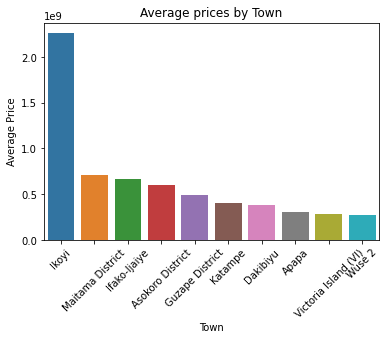

In [23]:
sns.barplot(x =avg_price_by_town['town'], y= avg_price_by_town['price'])
plt.title('Average prices by Town')
plt.xlabel('Town')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


## * Average price by Title

In [25]:
avg_price_by_title = df[['title','price']].groupby(by=df['title']).mean().sort_values('price',ascending=False).reset_index()[0:10]
avg_price_by_title

,title,price
0,Detached Duplex,4.003036e+08
1,Semi Detached Duplex,3.498845e+08
2,Block of Flats,1.757386e+08
3,Terraced Duplexes,1.219755e+08
4,Terraced Bungalow,4.448170e+07
5,Detached Bungalow,4.263333e+07
6,Semi Detached Bungalow,3.569936e+07


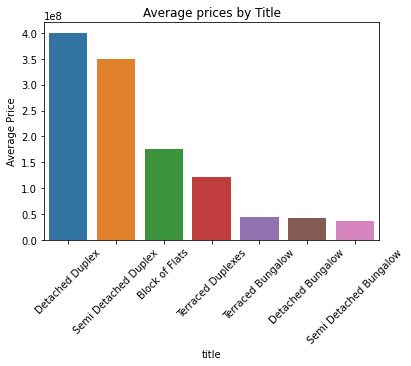

In [26]:
sns.barplot(x =avg_price_by_title['title'], y= avg_price_by_title['price'])
plt.title('Average prices by Title')
plt.xlabel('title')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

## Model Building

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder #for encoding

In [28]:
he = OneHotEncoder()
he.fit(df)

OneHotEncoder()

In [50]:
new_df = pd.get_dummies(df,columns=['title','town','state'])
new_df.head()

,bedrooms,bathrooms,toilets,parking_space,price,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,450000000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,5.0,4.0,800000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,5.0,5.0,4.0,120000000.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,40000000.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,75000000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# splitting the data into dependent and independent variable
x = new_df.drop(columns=['price'])
x.head()

,bedrooms,bathrooms,toilets,parking_space,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,5.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,5.0,5.0,4.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
y= df['price']
y.head()

0    450000000.0
1    800000000.0
2    120000000.0
3     40000000.0
4     75000000.0
Name: price, dtype: float64

## Train Test Split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [53]:
x_train.shape

(19460, 225)

In [54]:
y_train.shape

(19460,)

In [55]:
x_test.shape

(4866, 225)

In [56]:
y_test.shape

(4866,)

## Train Model

In [59]:
lm =LinearRegression()


In [60]:
lm.fit(x_train,y_train)

LinearRegression()

In [61]:
print(f"Intercept{lm.intercept_}")

Intercept3.373850243505427e+19


In [62]:
print(f"coefficients{lm.coef_}")

coefficients[ 2.13246691e+08 -2.03416098e+07  1.06450248e+08  1.62144591e+08
  4.86722032e+20  4.86722032e+20  4.86722032e+20  4.86722032e+20
  4.86722032e+20  4.86722032e+20  4.86722032e+20 -2.92650804e+19
 -6.70475384e+19 -6.70475384e+19  7.92611389e+18 -4.58831549e+20
 -6.70475384e+19 -6.70475384e+19 -6.70475384e+19 -6.70475384e+19
 -6.70475384e+19 -6.70475384e+19 -6.70475384e+19 -6.70475384e+19
 -6.70475384e+19 -6.70475384e+19  7.92611389e+18 -6.70475384e+19
 -6.70475384e+19 -6.70475384e+19  7.92611389e+18 -6.70475384e+19
 -6.70475384e+19 -6.70475384e+19 -6.70475384e+19 -3.01767482e+20
 -6.70475384e+19 -2.05442182e+20 -6.70475384e+19 -6.70475384e+19
 -2.43606295e+20 -6.70475384e+19 -6.70475384e+19 -2.19261379e+20
 -6.70475384e+19 -6.70475384e+19 -6.70475384e+19 -6.70475384e+19
 -4.63066293e+19  3.69154019e+18  4.60060089e+17 -4.75708009e+19
 -6.70475384e+19 -9.39787556e+19 -6.70475384e+19 -6.70475384e+19
 -2.80027055e+20 -6.70475384e+19  7.92611389e+18 -6.70475384e+19
 -6.70475384e

In [63]:
coef_df = pd.DataFrame(lm.coef_,x.columns,columns = ['coefficients'])
coef_df

,coefficients
bedrooms,2.132467e+08
bathrooms,-2.034161e+07
toilets,1.064502e+08
parking_space,1.621446e+08
title_Block of Flats,4.867220e+20
...,...
state_Ogun,-4.534130e+20
state_Osun,-4.741539e+20
state_Oyo,-4.534130e+20
state_Plateau,-3.588551e+20


## Predictions

In [64]:
y_pred = lm.predict(x_test)
y_pred

array([-2.33787392e+08, -3.96316672e+08,  1.06278912e+08, ...,
        9.62441216e+08,  2.36892160e+08,  7.82295040e+07])

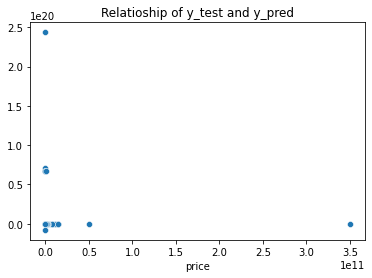

In [65]:
# compare thr y_pred and y_test
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Relatioship of y_test and y_pred')
plt.show()

## Model Evaluation

In [66]:
from sklearn import metrics

In [67]:
print(f"Mean Absolute Error {metrics.mean_absolute_error(y_test,y_pred)}.")

Mean Absolute Error 1.3500177096407994e+17.


In [45]:
print(f"Mean square Error {metrics.mean_absolute_error(y_test,y_pred)}.")

Mean square Error 364710130.2221922.


## Other Models

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [73]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression':GradientBoostingRegressor(),
    'KNN Regression': KNeighborsRegressor()
}

for name,model in models.items():
    model.fit(x_train,y_train) #train model
    y_pred = model.predict(x_test) #make prediction
    
    #calculate MSE
    mse = mean_squared_error(y_test,y_pred)
    #calculate R2 score
    r2 = r2_score(y_test,y_pred)
    
    print(f'{name}: ')
    print(f'MSE: {mse:.4f}')
    print(f'R2 Score: {r2:.4f}')
    print('-*-*-*-*-*-*-*-*-*-*-')

Linear Regression: 
MSE: 17839973584376380424931888448730562560.0000
R2 Score: -689808822870822784.0000
-*-*-*-*-*-*-*-*-*-*-
Decision Tree Regression: 
MSE: 112232103679447465984.0000
R2 Score: -3.3396
-*-*-*-*-*-*-*-*-*-*-
Random Forest Regression: 
MSE: 133450085450260529152.0000
R2 Score: -4.1600
-*-*-*-*-*-*-*-*-*-*-
Gradient Boosting Regression: 
MSE: 48163636521755516928.0000
R2 Score: -0.8623
-*-*-*-*-*-*-*-*-*-*-
KNN Regression: 
MSE: 79065543462205865984.0000
R2 Score: -2.0572
-*-*-*-*-*-*-*-*-*-*-


In [74]:
import joblib

In [75]:
# dump model in a file
joblib.dump(lm,'model.pk')

['model.pk']

In [76]:
model = joblib.load('model.pk')

In [77]:
model.predict(x_test)

array([-2.33787392e+08, -3.96316672e+08,  1.06278912e+08, ...,
        9.62441216e+08,  2.36892160e+08,  7.82295040e+07])